<a href="https://colab.research.google.com/github/KwameSegbe/Domestic-Violence-Related-Calls/blob/main/Domestic_Violence_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Francis Kwame Segbe
# Domestic Voilence-Related Calls Report

# Objective
The object of this project is to To conduct a preliminary exploratory data analysis (EDA) of a dataset containing information on calls reported to local police agencies, Our main focus is to understand focus on understanding the distribution of call volumes over the past years time, We are to look into data and try to understand the patterns, the prevalence and types of weapons involved in these incidents related calls, or try to find anomalies. The goal is to lay a foundation for future detailed predictive analytics or modeling efforts.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
df = pd.read_csv('DVRCA_2001-2022.csv', encoding="utf-8", low_memory=False)

In [ ]:
#Checking the first five rows of our dataset
df.head()

,YEAR,COUNTY,NCIC_AGENCY_CODE,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,0,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,0,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,0,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,0,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,0,19,0,0,0,19,0,NaN,NaN,NaN


# Data Cleaning

The main aim of this steps is to make sure we clean the data, of duplicates,missing values and inconsistent data type.

In [ ]:
# We first checked the shape of our data
print('Dataset Dimensions:', df.shape)

Dataset Dimensions: (181668, 15)


In [ ]:
#Checking for missing values within dataset.
df.isnull().sum()

YEAR                       0
COUNTY                     0
NCIC_AGENCY_CODE           0
MONTH                      0
TOTAL_CALLS                0
NO_WEAPONS                 0
WEAPONS_INVOLVED           0
SUB_FIREARM                0
SUB_KNIFE                  0
SUB_OTHER                  0
SUB_PERSONAL               0
WEAPON_NOT_RPT             0
TOTAL_STRANG_SUFFO    140396
SUB_STRANGULATION     140396
SUB_SUFFOCATION       140396
dtype: int64

From checking the null values we realised that, our dataset, does not really have a lot of null values except for the last few columns. A further investigation into these columns(TTOTAL_STRANG_SUFFO, SUB_STRANGULATION, SUB_SUFFOCATION) shows that they basically empty features. We would take them out in subsequent analysis.

In [ ]:
#I want takeout features missing values because those features have no data.
print(df.columns)

Index(['YEAR', 'COUNTY', 'NCIC_AGENCY_CODE', 'MONTH', 'TOTAL_CALLS',
       'NO_WEAPONS', 'WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE',
       'SUB_OTHER', 'SUB_PERSONAL', 'WEAPON_NOT_RPT', 'TOTAL_STRANG_SUFFO',
       'SUB_STRANGULATION', 'SUB_SUFFOCATION'],
      dtype='object')


In [ ]:
# Adjusting column names as per the actual names from df.columns output.
#We realised that most of the columns here are empty so we decided to drop them
df = df.drop(['TOTAL_STRANG_SUFFO', 'SUB_STRANGULATION', 'SUB_SUFFOCATION'], axis=1, errors='ignore')

What we did here was to isolate the features we were interested in taking out of our work and then dropped.

In [ ]:
#Checking the datatype of some features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181668 entries, 0 to 181667
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              181668 non-null  object
 1   COUNTY            181668 non-null  object
 2   NCIC_AGENCY_CODE  181668 non-null  object
 3   MONTH             181668 non-null  object
 4   TOTAL_CALLS       181668 non-null  object
 5   NO_WEAPONS        181668 non-null  object
 6   WEAPONS_INVOLVED  181668 non-null  object
 7   SUB_FIREARM       181668 non-null  object
 8   SUB_KNIFE         181668 non-null  object
 9   SUB_OTHER         181668 non-null  object
 10  SUB_PERSONAL      181668 non-null  object
 11  WEAPON_NOT_RPT    181668 non-null  object
dtypes: object(12)
memory usage: 16.6+ MB


After taken out our redundant features. We checked the information of the our dataset. This helped us understand the types of features we are dealing with. From this, we can see that, all features are in the object form, this will not be condusive for further predictive analysis so we will be converting relevant columns that should be in numeric format into integers.

In [ ]:
#Converting some features to numeric datatype
#These features are essential to any further analysis we will make hence the need to convert them into int data as they should be.
columns_to_convert = [
    'YEAR','MONTH','TOTAL_CALLS', 'NO_WEAPONS', 'WEAPONS_INVOLVED',
    'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL', 'WEAPON_NOT_RPT'
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

We converted all the features except county and NCIC_AGENCY_CODE into integers because they COUNTY represents the various individual counties calls were placed to and are by type supposed to categorical and then secondly, the NCIC_AGENCY_CODE representive of the codes agencies and really do not be in numeric to be used.

In [ ]:
#Checking the data type after some columns into numeric datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181668 entries, 0 to 181667
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              181668 non-null  int32 
 1   COUNTY            181668 non-null  object
 2   NCIC_AGENCY_CODE  181668 non-null  object
 3   MONTH             181668 non-null  int32 
 4   TOTAL_CALLS       181668 non-null  int32 
 5   NO_WEAPONS        181668 non-null  int32 
 6   WEAPONS_INVOLVED  181668 non-null  int32 
 7   SUB_FIREARM       181668 non-null  int32 
 8   SUB_KNIFE         181668 non-null  int32 
 9   SUB_OTHER         181668 non-null  int32 
 10  SUB_PERSONAL      181668 non-null  int32 
 11  WEAPON_NOT_RPT    181668 non-null  int32 
dtypes: int32(10), object(2)
memory usage: 9.7+ MB


Here we have the  various features in the format we need them to be to work with them.

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

                YEAR          MONTH    TOTAL_CALLS     NO_WEAPONS  \
count  181668.000000  181668.000000  181668.000000  181668.000000   
mean     2011.575710       6.488061      20.602539      10.898171   
std         7.877598       3.462604      79.866070      34.162940   
min         0.000000       0.000000       0.000000     -14.000000   
25%      2006.000000       3.000000       0.000000       0.000000   
50%      2012.000000       6.000000       5.000000       1.000000   
75%      2017.000000      10.000000      17.000000       9.000000   
max      2022.000000      12.000000    3295.000000     972.000000   

       WEAPONS_INVOLVED    SUB_FIREARM      SUB_KNIFE      SUB_OTHER  \
count     181668.000000  181668.000000  181668.000000  181668.000000   
mean           9.704367       0.153731       0.412588       1.405179   
std           57.636542       1.337626       2.465006       8.624884   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.0

In [ ]:
#Here we can see some misalignment of numbers or a new row introduced from our data preprocessing so we will have to handle it.
#We will investigate the row and take it out if we have to.
df.describe()

,YEAR,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT
count,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000,181668.000000
mean,2011.575710,6.488061,20.602539,10.898171,9.704367,0.153731,0.412588,1.405179,7.732848,0.000022
std,7.877598,3.462604,79.866070,34.162940,57.636542,1.337626,2.465006,8.624884,46.624461,0.004692
min,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,10.000000,17.000000,9.000000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000
max,2022.000000,12.000000,3295.000000,972.000000,2380.000000,146.000000,113.000000,435.000000,1886.000000,1.000000


There is something off about our dataset still. Looking at the min for the features we can zero which shouldn't.
Further analysis will be done to care of this.

In [ ]:
#This codes handles and drops the rows with zero
df = df[df['YEAR'] > 0]

# Check the shape of the dataset after removing any entries with year = 0
cleaned_shape_after_year_removal = df.shape

cleaned_shape_after_year_removal

(181667, 12)

In [ ]:
# We have a cleaned dataset for now.
df.describe()

,YEAR,MONTH,TOTAL_CALLS,NO_WEAPONS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT
count,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000,181667.000000
mean,2011.586782,6.488096,20.602652,10.898231,9.704421,0.153732,0.412590,1.405186,7.732890,0.000022
std,6.307355,3.462580,79.866275,34.163024,57.636696,1.337630,2.465013,8.624908,46.624586,0.004692
min,2001.000000,1.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,10.000000,17.000000,9.000000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000
max,2022.000000,12.000000,3295.000000,972.000000,2380.000000,146.000000,113.000000,435.000000,1886.000000,1.000000


# DATA EXPLORATION

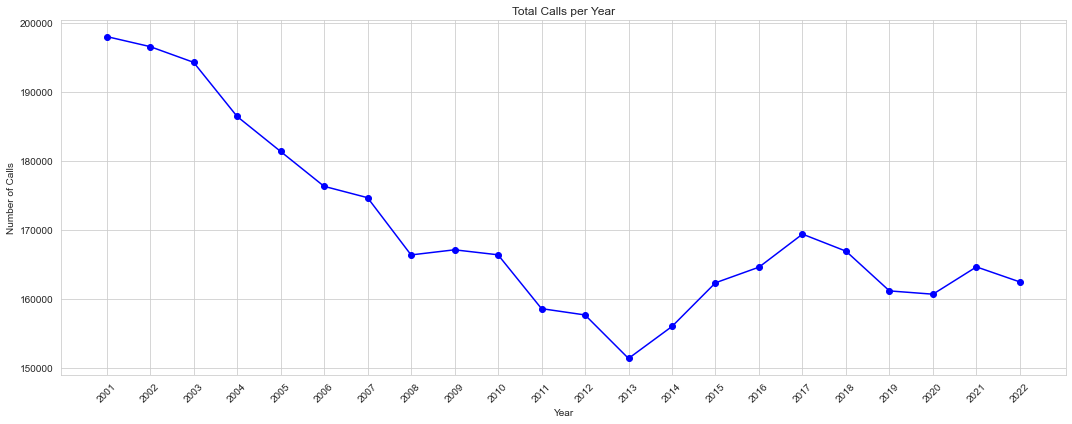

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# EDA: Distribution of Calls Over Time
plt.figure(figsize=(15, 6))

# Plot the total number of calls per year to observe any trends
yearly_calls = df.groupby('YEAR')['TOTAL_CALLS'].sum()
plt.plot(yearly_calls.index, yearly_calls.values, marker='o', linestyle='-', color='b')

plt.title('Total Calls per Year')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.xticks(yearly_calls.index, rotation=45)
plt.tight_layout()

We wanted to visualize the trend of calls volumns record over the past decades.
We see a decreasing trend from 20001 to 2013.
After 2013 we see that, there was a little increase in cases till 2017 and it's gone a little down since then.

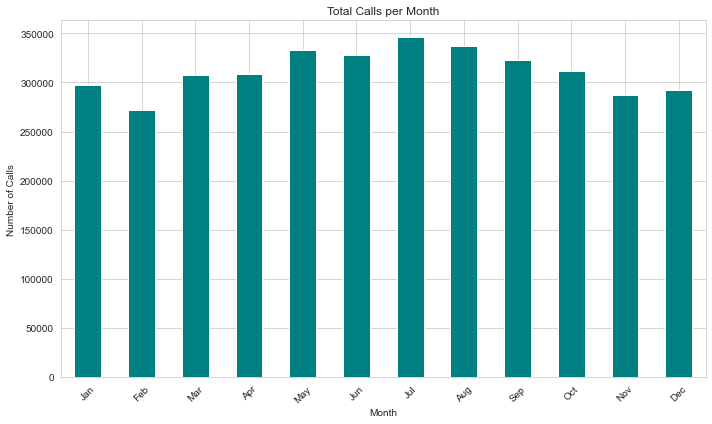

In [ ]:
# Analyzing Monthly Calls
# Calculate the total number of calls for each month to understand the distribution across the year

monthly_calls = df.groupby('MONTH')['TOTAL_CALLS'].sum()

# Plotting the total number of calls per month
plt.figure(figsize=(10, 6))
monthly_calls.plot(kind='bar', color='teal')
plt.title('Total Calls per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

Call volumn visualization in months. July seems to record the highest month of calls.
These could be attributed to all of factors. It could also be as result of summer time activities. This a personal observation and further statistal analysis would have to be done to be able to make an inference.

This visualization provides information about on which months needs police resources the most as well.
It helps in state department planning.

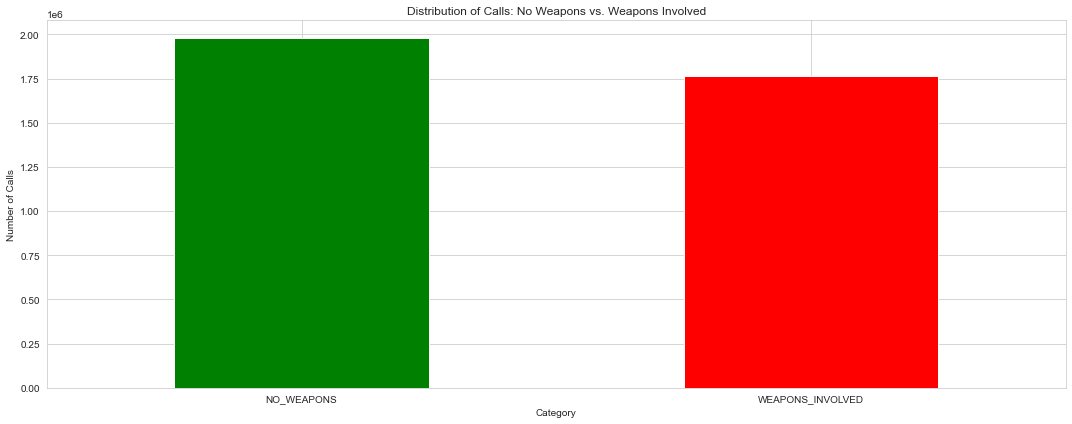

In [ ]:
# EDA: Distribution of Weapons Involvement
plt.figure(figsize=(15, 6))

# Plot the total calls with no weapons vs. weapons involved
weapons_data = df[['NO_WEAPONS', 'WEAPONS_INVOLVED']].sum()
weapons_data.plot(kind='bar', color=['green', 'red'])

plt.title('Distribution of Calls: No Weapons vs. Weapons Involved')
plt.xlabel('Category')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)

plt.tight_layout()

# Show plots
plt.show()

From this distribution we could see that, calls related weapons were slightly lower than calls not related to weapons.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'SUB_FIREARM'),
  Text(1, 0, 'SUB_KNIFE'),
  Text(2, 0, 'SUB_OTHER'),
  Text(3, 0, 'SUB_PERSONAL')])

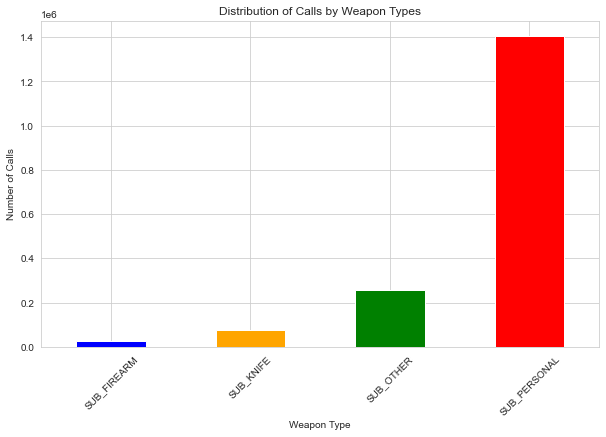

In [ ]:
# Further EDA: Types of Weapons Involved

# Calculate the total number of calls for each weapon category
weapon_types_data = df[['SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL']].sum()

# Plotting the distribution of calls by weapon types
plt.figure(figsize=(10, 6))
weapon_types_data.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Calls by Weapon Types')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)


The distribution above shows the most frequent weapons types that are involved in domestic voilence cases from calls made to county agencies.

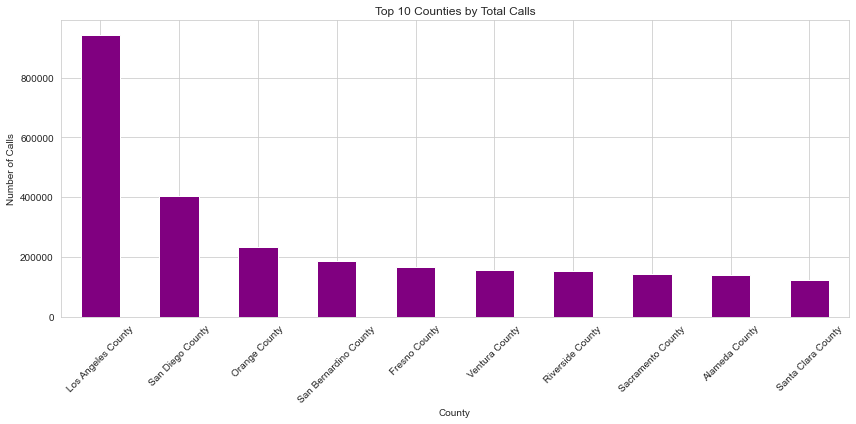

In [ ]:
# Calculate the total number of calls per county
county_calls = df.groupby('COUNTY')['TOTAL_CALLS'].sum().sort_values(ascending=False).head(10)

# Plotting the top counties by total calls
plt.figure(figsize=(12, 6))
county_calls.plot(kind='bar', color='purple')
plt.title('Top 10 Counties by Total Calls')
plt.xlabel('County')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The Above distribution show the top 10 counties with the most domestice voilence related calls.
This would provide critical insight for state department in providing policem logistics. It gives information about counties that need the most logistics.

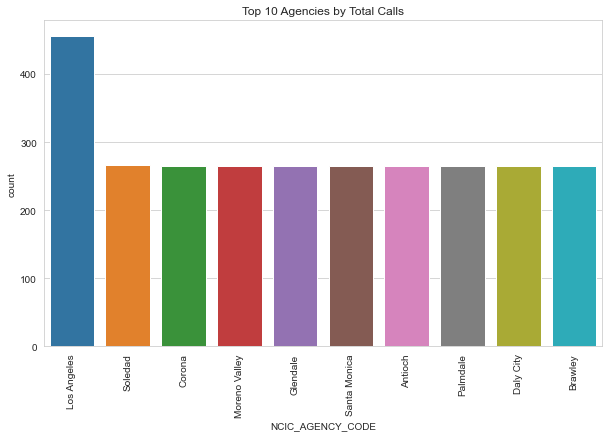

In [ ]:
plt.figure(figsize=(10, 6))
agency_counts = df['NCIC_AGENCY_CODE'].value_counts()[:10]
sns.countplot(data=df, x='NCIC_AGENCY_CODE', order=agency_counts.index)
plt.xticks(rotation=90)
plt.title('Top 10 Agencies by Total Calls')
plt.show()

A further analysis will give insights into specific agencies that requires the most resources as well.

In [ ]:
# I wanted to check skewness of our variables that could be used for further predictive analysis.
#So I chose to do a skewness test.
feature_skewness = df[['NO_WEAPONS', 'WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL', 'WEAPON_NOT_RPT']].skew()

feature_skewness

NO_WEAPONS            8.905019
WEAPONS_INVOLVED     19.674489
SUB_FIREARM          29.478110
SUB_KNIFE            20.094689
SUB_OTHER            21.019502
SUB_PERSONAL         18.872933
WEAPON_NOT_RPT      213.106781
dtype: float64

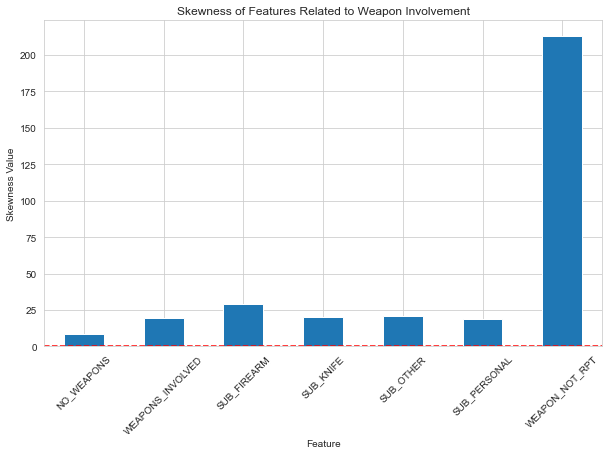

In [ ]:
# Visualizing the skewness of the features related to weapon involvement

plt.figure(figsize=(10, 6))
feature_skewness.plot(kind='bar')
plt.title('Skewness of Features Related to Weapon Involvement')
plt.xlabel('Feature')
plt.ylabel('Skewness Value')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [ ]:
correlation_matrix = df.corr()  # 'df' is your DataFrame
print("Correlation between firearms and knives:", correlation_matrix.loc['SUB_FIREARM', 'SUB_KNIFE'])

Correlation between firearms and knives: 0.677503129915582


Here we checked correlation between firearm and knife with a strong positive correlation. it give information to the state department that and emergency reponse team how best to respond. For instance, incase there's a call involving firearm, the police will most likely presume there might be knife involved as well and vise versa.

However, in predictive analytics, a strong positive correlation might give issues, since this will lead to multi-collinearity which will make our model uninvertible

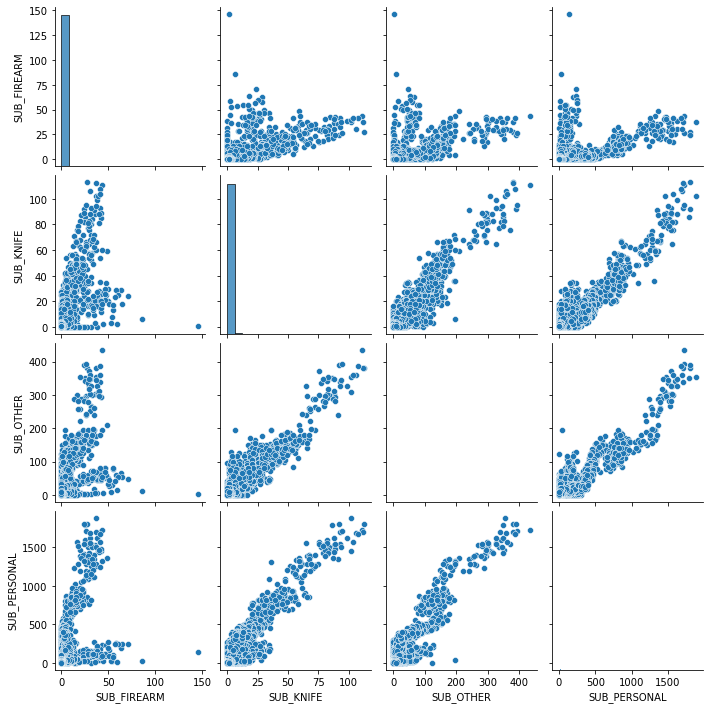

In [ ]:
# Identify pairs with a correlation above a certain threshold
interventions_df = df[['SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL']]
sns.pairplot(interventions_df)
plt.show()

The visualization above shows a mostly positive correlation between the features.